# 📚 Exercise Session - Week 1

Welcome to Week 1 exercise session of **CS-552: Modern NLP**!

> **What will be covered:**
> 1. [**TASK A:** Training a word embedding model](#1)
> 2. [**TASK B:** Word embedding similarity](#2)
> 3. [**TASK C:** Sentiment analysis of movie reviews](#3)

> **By the end of the session you will be able to:**
> - ✅  train from scratch a word embedding model
> - ✅  load and use pre-trained word embeddings 
> - ✅  perform word embedding analogies and understand their implicit biases
> - ✅  train and evaluate a sentiment classifier using word embeddings 

## Intro - Word embedding models

#### 🔵 What?
A word embedding is a learned representation for text where words that have the same meaning have a similar representation. It is this approach to representing words and documents that may be considered one of the key breakthroughs of deep learning on challenging natural language processing problems.


#### 🟡 How?
There are different versions of word embeddings depending on the way the embeddings are learned.
- Some of the models learn a focus word given the neighboring words that surround them
- Some other models learn the neighboring words given the focus word.
- Some other word embedding models try to derive the relationship between the words from global statistics of the words in the overall corpus.


#### 🟣 Why?
Word embedding is an important concept in NLP that is used for representing words for text analysis in the form of real-valued vectors. It is an advancement that has improved the ability of computers to understand text-based content in a better way. 


#### A little bit of history on word embeddings
In 2013, Tomas Mikolov et al. developed an algorithm for learning word embeddings called **Word2vec** [[paper](https://arxiv.org/abs/1301.3781)][[code](https://code.google.com/archive/p/word2vec/)]. This algorithm uses a shallow neural network to learn word vectors so that the representation of each word of a given corpus is good at predicting its own contexts (Skip-Gram) or vice versa (CBOW).

One year after the publication of Word2vec, Pennington et al. developed a new algorithm for learning word embeddings called **GloVe** [[paper](https://nlp.stanford.edu/pubs/glove.pdf)][[code](https://github.com/stanfordnlp/GloVe)]. This algorithm is based on the observation that word relationships can be recovered from the co-occurrence statistics of any (large enough) corpus.

<div style="padding:8px 0 8px 15px;border-left:3px solid orange;background-color:#F3F3F3; color: black">
    <h3>Goal of today's exercise</h3><br/>
In this exercise session, we will use both variants of these word embedding models (Word2Vec and GloVe) for our experiments.
For the first part, we will train from scratch a Word2vec model with different datasets. In the second part, we will load pre-trained Word2vec and GloVe embeddings and test them on how well they capture concept similarity among words. Finally, for the last part, we will train a simple sentiment analysis classifier with these pre-trained embeddings as we discussed in the lecture.

You will need to fill in all the missing pieces of code. For each one, you will be given a 🎯 `Goal` guidance that explains the steps you need to implement and a 💻 `API` reference with the functions or classes you can use to achieve each goal.

</div>

In [5]:
#!conda create -n "modern_nlp" python=3.10.11 --yes

In [6]:
#!conda activate modern_nlp

In [7]:
#!pip3 install pandas gensim numpy matplotlib seaborn scikit-learn tqdm torch torchmetrics

In [8]:
# imported libraries for this exercise
import pandas as pd
import numpy as np
from gensim.test.utils import common_texts
from gensim.utils import tokenize   
from gensim.models import Word2Vec
import gensim.downloader
import torch 
from torch import nn
from torch.utils.data import Dataset, DataLoader
from torchmetrics.classification import BinaryAccuracy
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

<a id="1"></a>
## 1. TASK A: Training a word embedding model from stratch 

In this part, you will train a model to learn vector representations of words and more specifically, we will train the word2vec model. 
To train the model we will use the Gensim library which is a free open-source Python library for representing documents as semantic vectors.
 
> **Gensim** is designed to process raw, unstructured digital texts (“plain text”) using unsupervised machine learning algorithms. The algorithms in Gensim, such as Word2Vec, FastText, Latent Semantic Indexing (LSI, LSA, LsiModel), Latent Dirichlet Allocation (LDA, LdaModel) etc, automatically discover the semantic structure of documents by examining statistical co-occurrence patterns within a corpus of training documents. These algorithms are unsupervised, which means no human input is necessary – you only need a corpus of plain text documents.
>
> You can discover all Gensim functionalities [here](https://radimrehurek.com/gensim/index.html).

To train your embedding model, you will need to instantiate Word2Vec and pass the data to the model to train with. We essentially need to pass on a list of lists, where each list within the main list contains a set of tokens from a user review. Word2Vec uses all these tokens to internally create a vocabulary.

**Data:** We will train our embedding model using a toy dataset that is provided by the Gensim library. You can use the dataset under the following path `gensim.test.utils.common_texts`. 

In [9]:
# bag of words for each sentence in toy dataset (imported from the gensim library in cell 2)
common_texts

[['human', 'interface', 'computer'],
 ['survey', 'user', 'computer', 'system', 'response', 'time'],
 ['eps', 'user', 'interface', 'system'],
 ['system', 'human', 'system', 'eps'],
 ['user', 'response', 'time'],
 ['trees'],
 ['graph', 'trees'],
 ['graph', 'minors', 'trees'],
 ['graph', 'minors', 'survey']]

#### Train a Gensim Word2Vec model

<div style="padding:8px 0 8px 15px;border-left:3px solid #03befc;background-color:#F3F3F3; color: black">
    
- 🎯 **Goal:** Train with `common_texts` dataset a Gensim word2vec model.<br>

- 💻  **API:** You can use `gensim.models.Word2Vec` class.
</div>

In [13]:
# instantiate and train model
# w2v_model =  ....

w2v_model = Word2Vec(sentences=common_texts, vector_size=100, window=5, min_count=1, workers=4)
w2v_model.train(common_texts, total_examples=w2v_model.corpus_count, epochs=w2v_model.epochs)


(19, 145)

In [14]:
# dict with vocabulary frequencies
words = w2v_model.wv.key_to_index
words

{'system': 0,
 'graph': 1,
 'trees': 2,
 'user': 3,
 'minors': 4,
 'eps': 5,
 'time': 6,
 'response': 7,
 'survey': 8,
 'computer': 9,
 'interface': 10,
 'human': 11}

#### Find word similarities

In [15]:
# explore embeddings
vector = w2v_model.wv['computer']  # get numpy vector of a word
print('The vector length of the word is {}.'.format(len(vector)))

The vector length of the word is 100.


<div style="padding:8px 0 8px 15px;border-left:3px solid #03befc;background-color:#F3F3F3; color: black">

- 🎯 **Goal:** Use the trained word2vec model to find most similar words for token _"computer"_.
- 💻 **API:** You can use Gensim's `.most_similar` function.

</div>

In [29]:
# print most similar words

similar_words = w2v_model.wv.most_similar('computer', topn=5)

similar_words = [t[0] for t in similar_words]


print('The most similar words to computer are: ', similar_words)

The most similar words to computer are:  ['system', 'survey', 'interface', 'time', 'trees']


<div style="padding:8px 0 8px 15px;border-left:3px solid gray;background-color:#F3F3F3; color: black">

#### Play around with inital settings

- Re-train the model with different datasets ( [Wikipedia](https://radimrehurek.com/gensim/corpora/wikicorpus.html), [Opinosis](https://radimrehurek.com/gensim/corpora/opinosiscorpus.html) ) and vector sizes and run similarity with different top-n. How would you comment on the results?
- Think about the limitations of the Word2vec approach.

</div>

***--- YOU CAN WRITE YOU ANSWER HERE ---***

---

<a id="2"></a>
## 2. TASK B: Word embedding similarity

For this task, we will use pre-trained word embedding models. 

**Word2Vec:** We will use once again Word2vec as in the previous question, but in this case we will load the pre-trained version of it that has been trained on a part of the Google News dataset (about 100 billion words). The model variant that we will use, contains 300-dimensional vectors for 3 million words and phrases.

**GloVe:** We will also use GloVe word embeddings that have been pre-trained on 2B tweets, 27B tokens, 1.2M vocab, uncased. The model variant that we will use contains 100-dimensional vectors.

Once we load the vector represenation of words, we will:
- find similarities between group of words.
- discover a very cool property of word embeddings through analogies.
- evaluate their performance on how well they capture the semantics between words on the SimLex task.


### 2.1 Using pre-trained word embedding models

In [30]:
# Show all available models in gensim-data
print(list(gensim.downloader.info()['models'].keys()))

['fasttext-wiki-news-subwords-300', 'conceptnet-numberbatch-17-06-300', 'word2vec-ruscorpora-300', 'word2vec-google-news-300', 'glove-wiki-gigaword-50', 'glove-wiki-gigaword-100', 'glove-wiki-gigaword-200', 'glove-wiki-gigaword-300', 'glove-twitter-25', 'glove-twitter-50', 'glove-twitter-100', 'glove-twitter-200', '__testing_word2vec-matrix-synopsis']


In [31]:
# Download the "word2vec-google-news-300" embeddings
w2v_vectors = gensim.downloader.load('word2vec-google-news-300')

[==================================================] 100.0% 1662.8/1662.8MB downloaded


In [32]:
# Download the "glove-wiki-gigaword-100" embeddings
glove_vectors = gensim.downloader.load('glove-wiki-gigaword-100')

[==================================================] 100.0% 128.1/128.1MB downloaded


The best way to understand a data is by visualizing them. We will use t-SNE to reduce the data with 300 dimensions to 2 dimensions, so that we can plot the data on our screens.
t-SNE is a non-linear dimensionality reduction algorithm that attempts to represent high-dimensional data and the underlying relationships between vectors in a lower-dimensional space.

In [33]:
# visualization utility function. NO NEED TO CHANGE ANYTHING HERE
sns.set_style('whitegrid')
sns.set_theme(rc={'figure.figsize':(11.7,8.27)})

def tsne_scatterplot(model, search_word, topn):
    labels = [search_word]
    tokens = [model[search_word]]
    similar = [1]
    close_words = model.similar_by_word(search_word, topn=topn)
    for word in close_words:
        tokens.append(model[word[0]])
        labels.append(word[0])
        similar.append(word[1])

    tsne_model = TSNE(n_components=2, perplexity=topn, init='pca')
    coordinates = tsne_model.fit_transform(np.array(tokens))
    df = pd.DataFrame({'x': [x for x in coordinates[:, 0]],
                       'y': [y for y in coordinates[:, 1]],
                       'words': labels,
                       'similarity': similar}
                      )
    fig, ax = plt.subplots()
    plot = ax.scatter(df.x, df.y, c=df.similarity, cmap='Reds')
    for i in range(len(df)):
        ax.annotate("  {} ({:.2f})".format(df.words[i].title(),
                                           df.similarity[i]),
                    (df.x[i], df.y[i]))

    plt.colorbar(mappable=plot, ax=ax)
    plt.title('t-SNE visualization for {}'.format(search_word))
    plt.show()

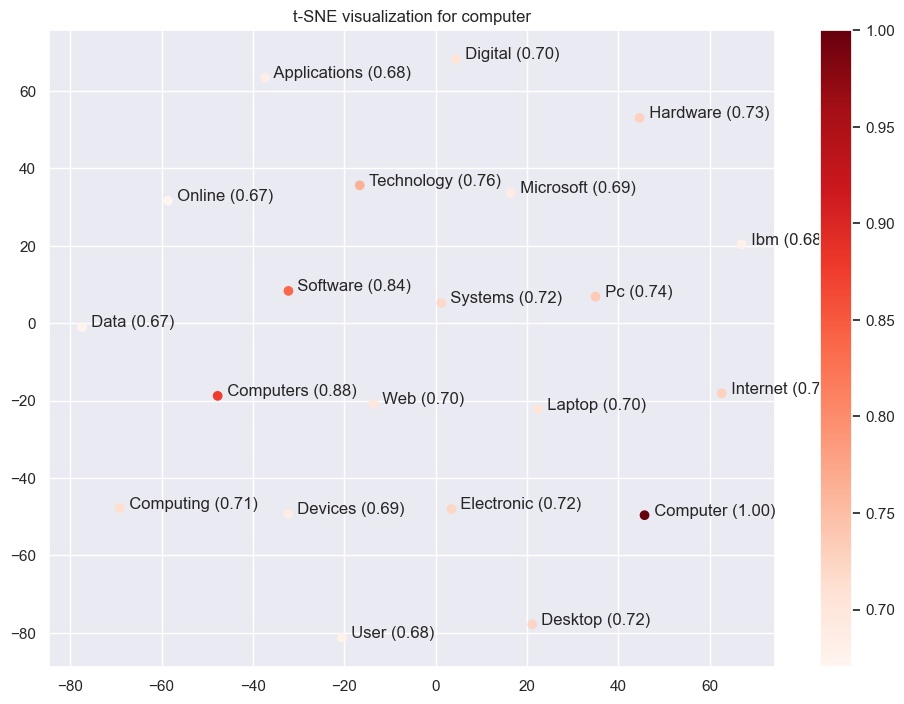

In [34]:
# visualize the most similar words for a given word.
tsne_scatterplot(glove_vectors, "computer", 20)

#### Interactive visualization

In the following link, you can explore the state-of-the-art models in an interactive embedding visualization: https://projector.tensorflow.org/.

Using the TensorBoard Embedding Projector, you can graphically represent high dimensional embeddings. This can be helpful in visualizing, examining, and understanding your embeddings.

Give it a try! Test interesting clusters of similar words! 

### 2.2 Check word analogies

The fact that we can analyze the use of words in language to deduce their meaning is a fundamental idea of [distributional semantics](https://en.wikipedia.org/wiki/Distributional_semantics). This is the inspiration behind many algorithms for learning numerical representations of words (word embeddings). An important aspect of these representations is the ability to solve word analogies of the form “A is to B what C is to X” using simple arithmetic. This is generally simplified as “King — Man + Woman $\sim$ Queen.

In this subquestion we will explore interesting relations that can be extracted from word embeddings. You will be given semantic relations and you need to implement the respective code using the embedding model.

<div style="padding:8px 0 8px 15px;border-left:3px solid #03befc;background-color:#F3F3F3; color: black">

- 🎯 **Goal:** Use the pre-trained GloVe embeddings to implement the following analogies.
- 💻 **API:** You can use Gensim's `.most_similar` function.

</div>

**Analogy A:**  `King` — `Man` + `Woman` ~ `?`

`?`: `Queen`

In [39]:
# Check the "most similar words", using the default "cosine similarity" measure. 
# ...

analogyA = glove_vectors.most_similar(positive=["king", "woman"], negative=["man"], topn=1)

print(analogyA)



[('queen', 0.7698540687561035)]


**Analogy B:**  `France` — `Paris` + `Athens` ~ `?`

`?`: `Greece`

In [43]:
# Check the "most similar words", using the default "cosine similarity" measure. 
# ...

analogyB = glove_vectors.most_similar(positive=["france", "athens"], negative=["paris"], topn=1)
print(analogyB)

[('greece', 0.7968204617500305)]


However, we should not forget that these models are trained in human generated language. Meaning that sociatital and demographic biases are inevitable. In the following example you will unfortunatelly witness these kind of biases that the model unitentionally proragates to its final output.

Fortunately, extensive reaserch has been developed the last years to tackle this issue trying to de-bias the embeddings models. More regarding this topic will be covered in Week 11  when we will be talking about Ethics in NLP regarding Toxicity, Bias and Fairness.

**Analogy C:**  `Doctor` - `Man` + `Woman` ~ `Nurse`

In [44]:
# Check the "most similar words", using the default "cosine similarity" measure. 
# ...

analogyC = glove_vectors.most_similar(positive=["doctor", "woman"], negative=["man"], topn=1)
print(analogyC)

[('nurse', 0.7735227942466736)]


### 2.3 Evaluate different models with SimLex

In this part of the exercise, we will evaluate the syntactic concreteness of the created vectors using their similarity. For this task, we will use the SimLex999 dataset which is a human-annotated dataset regarding the similarity of concepts of words.

- 📄 Paper: https://aclanthology.org/J15-4004.pdf
- 👾 More about the task: https://fh295.github.io/simlex.html

> - Download the data from [here](https://fh295.github.io/SimLex-999.zip)
> - Unzip the file and put the corresponding folder with the dataset in the same dir as this notebook

SimLex-999 is a gold standard resource for the evaluation of models that learn the meaning of words and concepts. SimLex-999 provides a way of measuring how well models capture similarity, rather than relatedness or association.

#### Dataset:
SimLex-999.txt is a tab-separated plaintext file, where rows correspond to concept pairs and columns correspond to the properties of each pair.

|Column | Description |
|-------|:-------------|
|word1| The first concept in the pair.|
|word2| The second concept in the pair. Note that the order is only relevant to the column Assoc(USF). These values (free association scores) are asymmetric. All other values are symmetric properties independent of the ordering word1, word2.|
|POS| The majority part-of-speech of the concept words, as determined by occurrence in the POS-tagged British National Corpus. Only pairs of matching POS are included in SimLex-999.|
|SimLex999 | The SimLex999 similarity rating. Note that average annotator scores have been (linearly) mapped from the range [0,6] to the range [0,10] to match other datasets such as WordSim-353. |
|conc(w1)| The concreteness rating of word1 on a scale of 1-7. Taken from the University of South Florida Free Association Norms database. |
|conc(w2)| The concreteness rating of word2 on a scale of 1-7. Taken from the University of South Florida Free Association Norms database.|
|concQ| The quartile the pair occupies based on the two concreteness ratings. Used for some analyses in the above paper.|
|Assoc(USF)| The strength of free association from word1 to word2. Values are taken from the University of South Florida Free Association Dataset.|
|SimAssoc333| Binary indicator of whether the pair is one of the 333 most associated in the dataset (according to Assoc(USF)). This subset of SimLex999 is often the hardest for computational models to capture because the noise from high association can confound the similarity rating. See the paper for more details.|
|SD(SimLex)| The standard deviation of annotator scores when rating this pair. Low values indicate good agreement between the 15+ annotators on the similarity value SimLex999. Higher scores indicate less certainty. |

We will be using the **`SimLex999` similarity column** to evaluate our word embeddings on this dataset. We will select the top 50 most similar pairs according to simlex999 column which a score from 0 to 10 regarding the similarities of the two words (columns: word1, word2) and it has been annotated by humans. On this subset of data, we will find the similarity score of the two words using our two pre-trained embedding models (Word2Vec, GloVe). 

In [46]:
# read data
simlex = pd.read_csv('SimLex-999/SimLex-999/SimLex-999.txt', delimiter='\t')
simlex = simlex[['word1', 'word2', 'SimLex999']]
simlex.head()

,word1,word2,SimLex999
0,old,new,1.58
1,smart,intelligent,9.20
2,hard,difficult,8.77
3,happy,cheerful,9.55
4,hard,easy,0.95


<div style="padding:8px 0 8px 15px;border-left:3px solid #03befc;background-color:#F3F3F3; color: black">

- 🎯 **Goal:** Print the min, avg and max values of SimLex999 score.

</div>

In [48]:
# stats on the SimLex999 similarity score
# ...

print('min : ', simlex['SimLex999'].min())
print('avg : ', simlex['SimLex999'].mean())
print('max : ', simlex['SimLex999'].max())


min :  0.23
avg :  4.561571571571572
max :  9.8


<div style="padding:8px 0 8px 15px;border-left:3px solid #03befc;background-color:#F3F3F3; color: black">

- 🎯 **Goal:** Select the top 50 pairs with the highest SimLex similarity score.
</div>

In [53]:
# select a subset of word-pairs with the highest similiarity score given by annotators
# simlex_similar_pairs = ...¨

simlex_similar_pairs = simlex.nlargest(50, 'SimLex999')

print(simlex_similar_pairs)

           word1        word2  SimLex999
782       vanish    disappear       9.80
22         quick        rapid       9.70
205      creator        maker       9.62
8         stupid         dumb       9.58
16        insane        crazy       9.57
3          happy     cheerful       9.55
42         large          big       9.55
140          cow       cattle       9.52
18         large         huge       9.47
134         area       region       9.47
28        simple         easy       9.40
71       bizarre      strange       9.37
121      student        pupil       9.35
234     attorney       lawyer       9.35
781        occur       happen       9.32
162      hallway     corridor       9.28
128      teacher   instructor       9.25
799       inform       notify       9.25
1          smart  intelligent       9.20
34         weird          odd       9.20
143         taxi          cab       9.20
6          happy         glad       9.17
65        scarce         rare       9.17
529      drizzle

<div style="padding:8px 0 8px 15px;border-left:3px solid #03befc;background-color:#F3F3F3; color: black">

- 🎯 **Goal:** For each word pair from `simlex_similar_pairs`, compute the similarity between the GloVe embeddings (also Word2Vec embeddings) of the words.
- 💻 **API:** You can use Gensim's `.similarity` function.

</div>

In [62]:
# computes the similarities of each pair using each word embedding model
# similarities = ...

similarities = list()
for _, pair in simlex_similar_pairs.iterrows():
    w1 = pair['word1']
    w2 = pair['word2']
    sim = pair['SimLex999']
    glove_sim = glove_vectors.similarity(w1, w2)
    w2v_sim = w2v_vectors.similarity(w1, w2)
    similarities.append([w1, w2, sim, glove_sim, w2v_sim])

print(similarities)

similarities = pd.DataFrame(similarities, columns=['word1', 'word2', 'simlex999', 'similarity_glove', 'similarity_w2v'])

[['vanish', 'disappear', 9.8, 0.8814944, 0.90042275], ['quick', 'rapid', 9.7, 0.5612247, 0.49779078], ['creator', 'maker', 9.62, 0.24384524, 0.26050574], ['stupid', 'dumb', 9.58, 0.83606493, 0.8173138], ['insane', 'crazy', 9.57, 0.59173715, 0.7339043], ['happy', 'cheerful', 9.55, 0.5459937, 0.38377383], ['large', 'big', 9.55, 0.7082057, 0.55614793], ['cow', 'cattle', 9.52, 0.7192909, 0.6319464], ['large', 'huge', 9.47, 0.80872744, 0.6589166], ['area', 'region', 9.47, 0.74587756, 0.56854206], ['simple', 'easy', 9.4, 0.7649386, 0.59902996], ['bizarre', 'strange', 9.37, 0.81445813, 0.73785883], ['student', 'pupil', 9.35, 0.48680162, 0.512326], ['attorney', 'lawyer', 9.35, 0.8483661, 0.82045114], ['occur', 'happen', 9.32, 0.6355997, 0.6608624], ['hallway', 'corridor', 9.28, 0.36172378, 0.32185915], ['teacher', 'instructor', 9.25, 0.70771205, 0.5253284], ['inform', 'notify', 9.25, 0.7832962, 0.67163813], ['smart', 'intelligent', 9.2, 0.7552733, 0.6495277], ['weird', 'odd', 9.2, 0.75502366, 

In [63]:
similarities.head()

,word1,word2,simlex999,similarity_glove,similarity_w2v
0,vanish,disappear,9.80,0.881494,0.900423
1,quick,rapid,9.70,0.561225,0.497791
2,creator,maker,9.62,0.243845,0.260506
3,stupid,dumb,9.58,0.836065,0.817314
4,insane,crazy,9.57,0.591737,0.733904


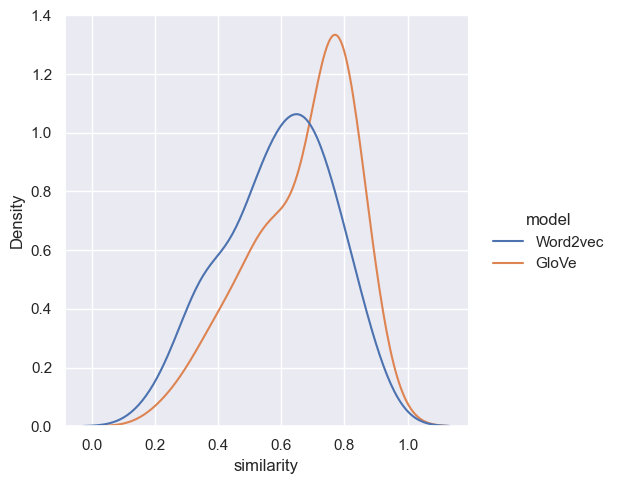

In [64]:
# plots the distribution of similarity scores for each model
sims_w2v = similarities[['similarity_w2v']].rename(columns = {'similarity_w2v': 'similarity'})
sims_w2v['model'] = 'Word2vec'
sims_glove = similarities[['similarity_glove']].rename(columns = {'similarity_glove': 'similarity'})
sims_glove['model'] = 'GloVe'
to_plot = pd.concat([sims_w2v, sims_glove], ignore_index=True)
sns.displot(to_plot, x="similarity", hue="model", kind="kde")

<div style="padding:8px 0 8px 15px;border-left:3px solid gray;background-color:#F3F3F3; color: black">

#### Extra quiz: 
Think about which model seems to perform better on these high-similarity examples and why based on your knowledge of how the embedding models have been trained.

</div>

----

<a id="3"></a>
## 3. TASK C: Sentiment analysis of movie reviews

For this part, we will be using only the GloVe pre-trained embeddings. 

**Data:** We will build a sentiment classification model using the IMDB review dataset.

> - Download the dataset [here](https://www.kaggle.com/datasets/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews/download?datasetVersionNumber=1)
> - Save the .csv file in the same dir as this notebook. 

The IMDB dataset has 50K movie reviews for natural language processing or Text analytics. This is a dataset for binary sentiment classification containing substantially more data than previous benchmark datasets. We provide a set of 25,000 highly polar movie reviews for training and 25,000 for testing.

The goal is to predict if a review is positive or negative using a classification (potentiall deep learning) algorithm.

For more dataset information, please go through the following link,
http://ai.stanford.edu/~amaas/data/sentiment/

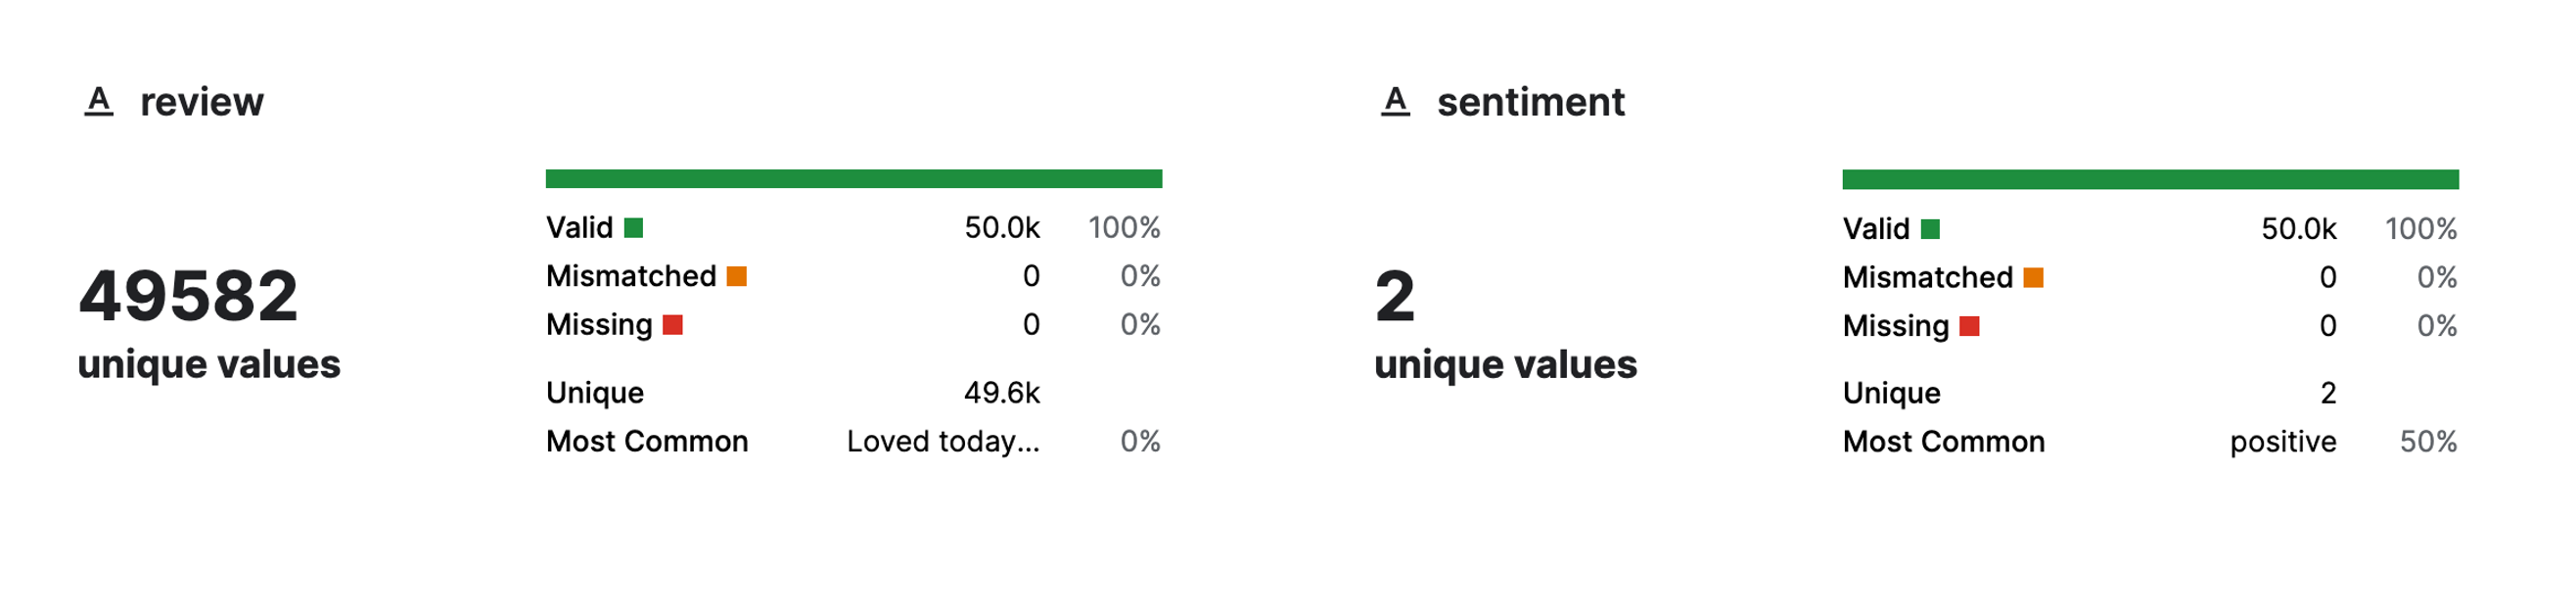

### 3.1 Dataset exploration

In [66]:
#read dataset
movie_reviews = pd.read_csv('IMDB Dataset/IMDB Dataset.csv')
movie_reviews.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [67]:
print('Number of movie reviews: {}'.format(len(movie_reviews)))
classes = movie_reviews['sentiment'].unique()
print('Number of classes: {} with values: {}'.format(len(classes), classes))

Number of movie reviews: 50000
Number of classes: 2 with values: ['positive' 'negative']


# of positive samples: 25000
# of negative samples: 25000


<Axes: xlabel='sentiment', ylabel='count'>

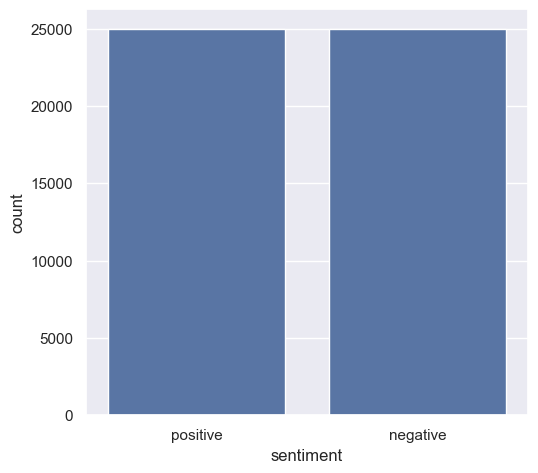

In [ ]:
# class distribution
positive = len(movie_reviews[movie_reviews['sentiment']=='positive'])
negative = len(movie_reviews[movie_reviews['sentiment']=='negative'])

print('# of positive samples: {}'.format(positive))
print('# of negative samples: {}'.format(negative))

sns.set_theme(rc={'figure.figsize':(5.7,5.27)})
sns.countplot(x=movie_reviews['sentiment'])

### 3.2 Data preprocessing

To build our classifier, we will leverage the pre-trained word embeddings (GloVe). Going from word embeddings to sentence vectors, we will need to find a way to take into account the embeddings of all the words each review contains. We will apply 2 techniques to do so: average and max pooling.  

We will perform the following preprocessing steps:
- Change the classes from str (negative, positive) to binary `(0, 1)`.
- Get word embeddings and calculate the sentence vectors with both max and avg pooling.
- Create a `pytorch.Dataset` instance of the IMDB data.

#### From class names to binary

<div style="padding:8px 0 8px 15px;border-left:3px solid #03befc;background-color:#F3F3F3; color: black">

- 🎯 **Goal:** Change the classe names from str (negative, positive) to binary `(0, 1)` and add it as a new column to the exising dataframe.

</div>

In [69]:
# classes to binary
# movie_reviews['target'] = ...

movie_reviews['target'] = movie_reviews['sentiment'].apply(lambda x: 1 if x == 'positive' else 0)

#### From word embeddings to review embeddings

<div style="padding:8px 0 8px 15px;border-left:3px solid #03befc;background-color:#F3F3F3; color: black">

- 🎯 **Goal:** For each review in the dataset, calculate the review vector by pooling from the review's word embeddings. Implement both max and avg pooling.
- 💻 **API:** You can use numpy functions to manipulate the arrays. For review tokenization you can use `gensim.utils.tokenize` function.

</div>

In [70]:
# apply embedding model to the words of the reviews and then perform pooling

# review_vectors_max = np.array(...
# review_vectors_avg = np.array(...
 
review_vectors_max = np.array([np.max([w2v_vectors[word] for word in tokenize(review)], axis=0) for review in movie_reviews['review']])
review_vectors_avg = np.array([np.mean([w2v_vectors[word] for word in tokenize(review)], axis=0) for review in movie_reviews['review']])
print('Shape of the max pooled review vectors: ', review_vectors_max.shape)
print('Shape of the avg pooled review vectors: ', review_vectors_avg.shape)


KeyError: "Key 'of' not present"

#### Pytorch Dataset class for the imported data

<div style="padding:8px 0 8px 15px;border-left:3px solid #03befc;background-color:#F3F3F3; color: black">

- 🎯 **Goal:** Create a pytorch Dataset class with the input data. Instantiate this class with the input data.
- 💻 **API:** You can use `torch.utils.data.Dataset` class.

</div>

In [ ]:
# class IMDBreviews(Dataset):
#     def __init__(self,...):
#         ...
    
#     def __len__(self):
#         ...

#     def __getitem__(self, ...):
#         ...

# dataset = IMDBreviews(...)

In [ ]:
# print tensors for sanity check
print('Total samples {} with sentence embedding size: {}'.format(dataset.x.shape[0], dataset.x.shape[1]))

#### Splitting dataset to train and test subsets

<div style="padding:8px 0 8px 15px;border-left:3px solid #03befc;background-color:#F3F3F3; color: black">

- 🎯 **Goal:** Split the dataset into train and test tests (80-20% splits).
- 💻 **API:** You can use `torch.utils.data.random_split` function.

</div>

In [ ]:
# split to train and test sets
# train, test = ...

In [ ]:
print('Train size: {}'.format(len(train)))
print('Test size: {}'.format(len(test)))

### 3.3 Train & evaluate a classifier on the movie reviews

Once we have proprocessed the data, we will create the training and evaluation pipelines.


#### Pytorch Module class for model setup

<div style="padding:8px 0 8px 15px;border-left:3px solid #03befc;background-color:#F3F3F3; color: black">

- 🎯 **Goal:** Create a pytorch model class. The architecture of the model can be as simple as a Linear layer along with a sigmoid activation function, or a more complicated deep architecture. Play around with different settings and architectures.
- 💻 **API:** You can use `torch.nn.Module` class.

</div>

In [ ]:
# create a pytorch nn.Module class for the simple logistic regression model
# class SentimentAnalysisModel(nn.Module):

#     def __init__(self, ...):
#         super(SentimentAnalysisModel, self).__init__()
#         ...

#     def forward(self, ...):
#         ...

In [ ]:
model = SentimentAnalysisModel(dataset.x)
model

In [ ]:
def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

print(f'The model has {count_parameters(model):,} trainable parameters')

#### Pytorch Data loader class for dataset batching

In [ ]:
# create data loader
BATCH_SIZE = 64
train_loader = DataLoader(train, batch_size=BATCH_SIZE, shuffle=True)
test_loader= DataLoader(test, batch_size=BATCH_SIZE)

#### Training the model

In [ ]:
# Construct our loss function and an Optimizer. The call to model.parameters()
# in the SGD constructor will contain the learnable parameters of the two
# nn.Linear modules which are members of the model.
from torch import optim
criterion = nn.BCELoss()
optimizer = optim.SGD(model.parameters(), lr=1e-1)

<div style="padding:8px 0 8px 15px;border-left:3px solid #03befc;background-color:#F3F3F3; color: black">

- 🎯 **Goal:** Create the training loop: for each epoch, do the forward pass, compute the loss and do the backward propagation.
- 💻 **API:** Check the official API for the [training process](https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html#train-the-network).

</div>

In [ ]:
# Training loop
# model.train()
# for epoch in range(10):
#     epoch_loss = 0
#     for i, data in enumerate(train_loader, 0):
#         # get the inputs
#         ...
        
#         # Forward pass: Compute predicted y by passing x to the model
#         ...
        
#         # Compute loss
#         ...
        
#         # Perform a backward pass, and update the weights.
#         ...
#     print(f'Epoch {epoch + 1} | Loss: {(epoch_loss / len(train_loader)):.4f}')

#### Inference on the test set


<div style="padding:8px 0 8px 15px;border-left:3px solid #03befc;background-color:#F3F3F3; color: black">

- 🎯 **Goal:** Evaluate your model on the test set: for each batch of data, do the forward pass and compute the loss and the accuracy score.
- 💻 **API:** Check the official API for the [testing process](https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html#test-the-network-on-the-test-data).

</div>

In [ ]:
# batch_loss = 0
# batch_acc = 0

# model.eval()
# for i, data in enumerate(test_loader, 0):
#     # get the inputs
#     ...
    
#     # run forward pass
#     ...
    
#     # Compute loss
#     ...
    
#     # Compute accuracy
#     acc = BinaryAccuracy()
#     ...
    
#     batch_loss += test_loss.item()
#     batch_acc += acc.item()

# test_loss = batch_loss / len(test_loader)
# test_acc = batch_acc / len(test_loader)

# print(f'Test Acc: {test_acc*100:.2f}%')

<div style="padding:8px 0 8px 15px;border-left:3px solid gray;background-color:#F3F3F3; color: black">

#### Extra quiz:
Play around with different settings (e.g. learning rate, batch size, epochs) and different architectures. Additionally try different pooling methods. Think how your design choices affect model performance on both train and test sets.

</div>

### 🎉 Congrats! You finished your first exercise session! 

Awesome work! See you next week! 👋